In [1]:
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
messages = pd.read_csv('/content/SMSSpamCollection',sep = '\t', names = ['label', 'message'])

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length'] = messages['message'].apply(len)

In [7]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


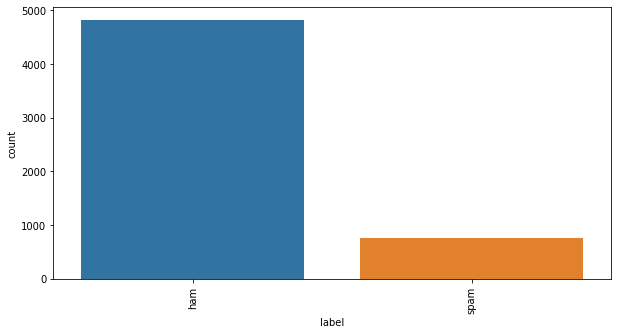

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x="label", data=messages)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


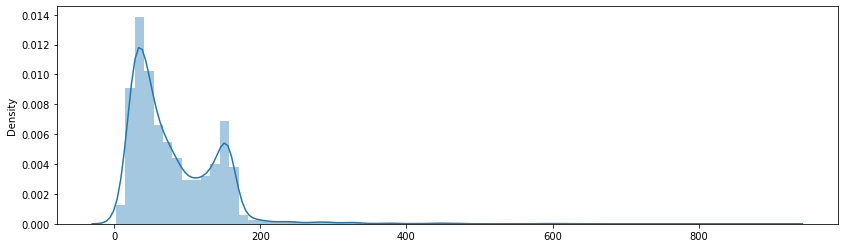

In [10]:
plt.figure(figsize=(14,4))
sns.distplot(messages.length.values,70)
plt.show()

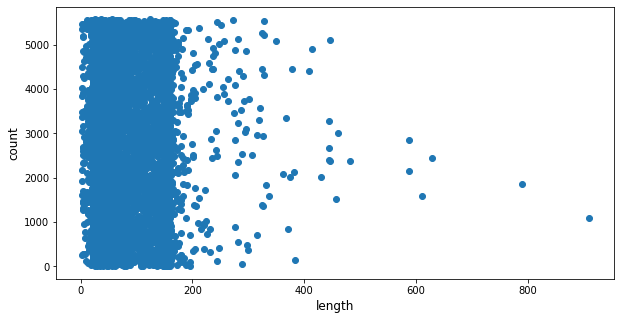

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(messages.length.values, range(messages.shape[0]))
plt.xlabel('length', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

In [12]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa7d579400>,
      dtype=object)

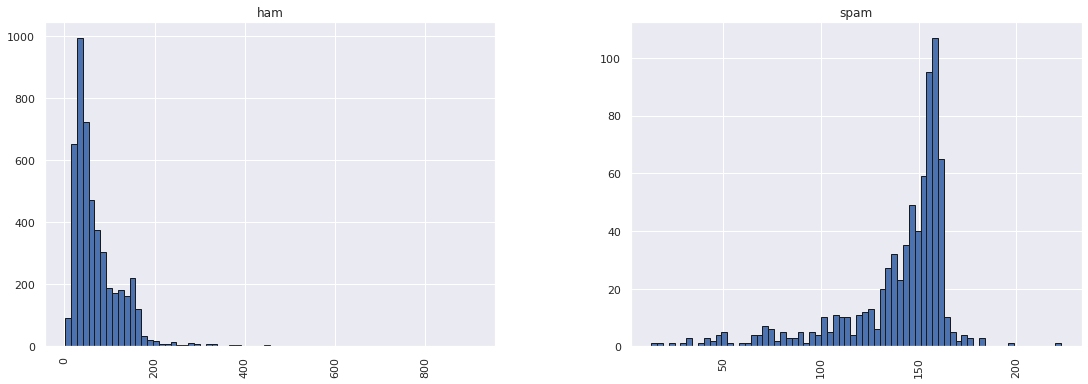

In [13]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize' : (18,6)})
messages.hist(column = 'length', by = 'label', bins = 70, edgecolor = 'k')

Here we see that :
Ham message is centered around 1-100
spam message is certered around 150

In [14]:
import string

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each


**Data pre-processing**

In [18]:
def text_processing(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
messages['message'].head().apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(messages['message'])

In [22]:
print(len(bow_transformer.vocabulary_))

11425


In [23]:
mess4 = messages['message'][3]

In [24]:
#mess4
bow4 = bow_transformer.transform([mess4])

In [25]:
bow4.shape

(1, 11425)

In [26]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [27]:
bow_transformer.get_feature_names()[9554]

'say'

In [28]:
messages_bow =bow_transformer.transform(messages['message'])

In [29]:
messages_bow.shape

(5572, 11425)

In [30]:
messages_bow.nnz

50548

In [31]:
sparsity = 100.0*messages_bow.nnz/(messages_bow.shape[0]*messages_bow.shape[1])


In [32]:
sparsity

0.07940295412668218

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer 

In [34]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [35]:
tfidf4 = tfidf_transformer.transform(bow4)

In [36]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [37]:
#checking Inverse document freq. for a one word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [38]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [39]:
messages_tfidf.shape

(5572, 11425)

# Naive bayes 

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [42]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [43]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [44]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Training

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],
                                                            messages['label'], 
                                                            test_size = 0.3)

In [47]:
from sklearn.pipeline import Pipeline

**Random Forest Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [50]:
pipeline.fit(msg_train, label_train)                     


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7faa7d585158>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Test

In [51]:
predictions = pipeline.predict(msg_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1447
        spam       1.00      0.75      0.85       225

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.96      1672



In [54]:
print(confusion_matrix(label_test, predictions))

[[1447    0]
 [  57  168]]


In [55]:
#Lets fit a Random forest classifier
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [56]:
pipeline2.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7faa7d585158>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [57]:
predictions2 = pipeline2.predict(msg_test)
print(classification_report(label_test, predictions2))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1447
        spam       0.99      0.84      0.91       225

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [58]:
from sklearn.metrics import classification_report

print(classification_report(label_test, predictions2))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1447
        spam       0.99      0.84      0.91       225

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

